### Testing the ```utils.Filehandling.FileHandlingInterface``` module

In [1]:
from src.lib.utils.FileHandling.FileHandlingInterface import *
from src.lib.probabilityEstim.Likelihood import *
import matplotlib.pyplot as plt
import logging
import time
import warnings

In [2]:
numba_logger = logging.getLogger('numba')
numba_logger.setLevel(logging.DEBUG)
warnings.simplefilter("always", RuntimeWarning)

In [54]:
PASCAL_DEMO_IMAGE_PATH = r".\data\demoPascal\2010_005258.jpg"
PASCAL_DEMO_SCRIBBLE_PATH = r".\data\demoPascal\2010_005258.xml"

In [55]:
sample_image = TargetImage(
    PASCAL_DEMO_IMAGE_PATH             
)

In [56]:
image_array = sample_image.get_image_array()

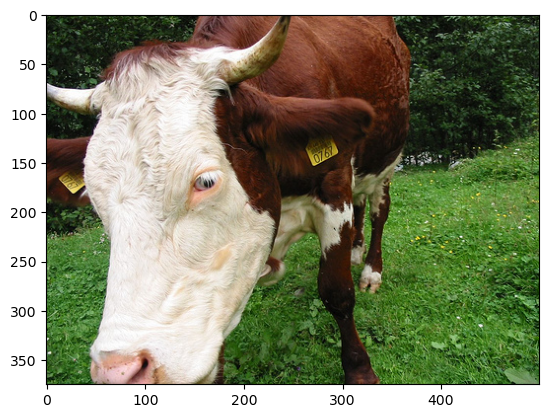

In [57]:
plt.imshow(image_array.transpose((2, 1, 0)))

In [58]:
sample_scribble = EncodedScribble(
    PASCAL_DEMO_SCRIBBLE_PATH
)

debug values: 

*    0 -> No debugging (Default)
*    1 -> Spatial Kernel
*    2 -> Chromatic Kernel
*    3 -> Spatial Kernel Exponent Argument
*    4 -> Chromatic Kernel Exponent Argument
*    5 -> Spatial Kernel Normalization Term 
*    7 -> Spatial Kernel Width

In [59]:
n_classes = sample_scribble.get_n_classes()

In [60]:
likelihood = Likelihood(
    n_classes,  
    return_ = 7,
    #alpha = 13, 
    #sigma = 18
)

Normalized Kernel

In [61]:
time0 = time.time()
fitted_likelihood = likelihood.fit(
    sample_image, 
    sample_scribble,
    normalize = True,
    neg_log = True
)
print(f"{time.time() - time0}")

dtype float64
0.8832056522369385


Plotting

In [62]:
likelihood_to_plot = fitted_likelihood

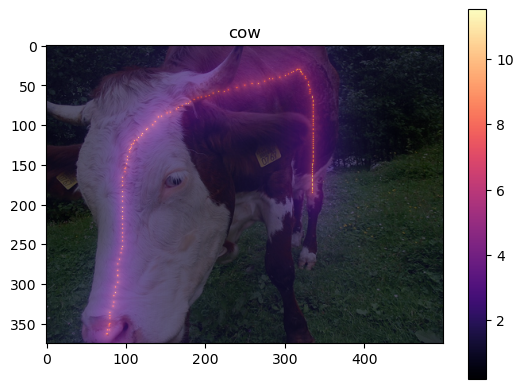

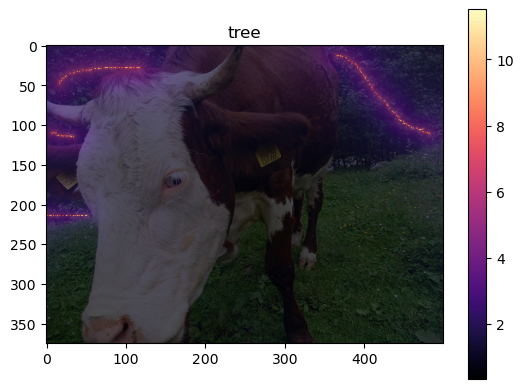

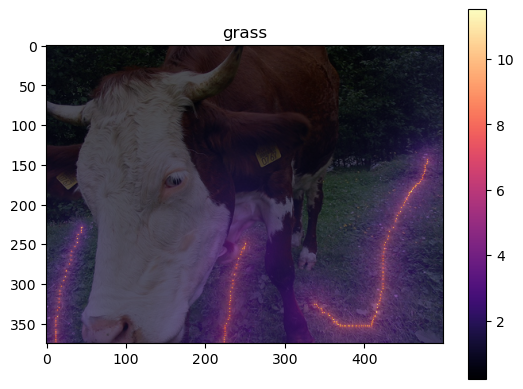

In [63]:
classes = list(sample_scribble.get_scribble_dictionary().keys())
for dim in range(likelihood_to_plot.shape[0]):
    # Create a new figure and axis for each plot
    fig, ax = plt.subplots()
    
    vmin = np.min(likelihood_to_plot[dim])
    vmax = np.max(likelihood_to_plot[dim])
    im1 = ax.imshow(likelihood_to_plot[dim].transpose((1, 0)), cmap='magma', alpha=1.0, vmin=vmin, vmax=vmax)
    
    # Add a title and colorbar legend to the plot
    ax.set_title(classes[dim]) 
    fig.colorbar(im1, ax=ax, label='')
    
    # Plot the image array on the same axis
    im2 = ax.imshow(image_array.transpose((2, 1, 0)), alpha=0.3)
    
    
    # Save the plot as a PNG image file
    #fig.savefig(f'plots/2010/factorised_likelihood_plot_{classes[dim]}.png', dpi=300)
    # Show the plot
    plt.show()

In [43]:
np.argwhere(np.isnan(fitted_likelihood))

array([], shape=(0, 3), dtype=int64)